# Telecom Customer Churn Prediction

The aim of this project is to analyze customer demographics, services, tenure and other variables to predict whether a particular customer will churn or not.

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
#Loading the dataset
csv_path = Path(r'C:\Users\USUARIO\Desktop\Business-focus-data-science\database\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv(csv_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Preprocessing Part1

In [3]:
#Checking the shape of the dataset
df.shape

(7043, 21)

In [4]:
#Removing the customerID column
df.drop(columns='customerID', inplace=True)

In [5]:
#Checking for duplicate values
df.duplicated().sum()

np.int64(22)

In [6]:
#Removing the duplicate values
df.drop_duplicates(inplace=True)
#Checking the shape of the dataframe after removing duplicates
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#Type casting column Total Charges.
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
#Checking for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#Droping the null values
df.dropna(inplace=True)

In [9]:
#Checking number of unique values in each column
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [10]:
#Checking the unique values in each column
cols = df.columns
for i in cols:
    print(i, df[i].unique(), '\n')
    

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

In the exploratory data analysis, I will be visualizing the data to get a better understanding of the data and to see if there are any trends or pattern in the data. First I will begin with looking at the distribution of the data and then I will look at the relationship between the independent variables and the target variable.

#### Customer Demographics

Text(0.5, 1.0, 'Dependents')

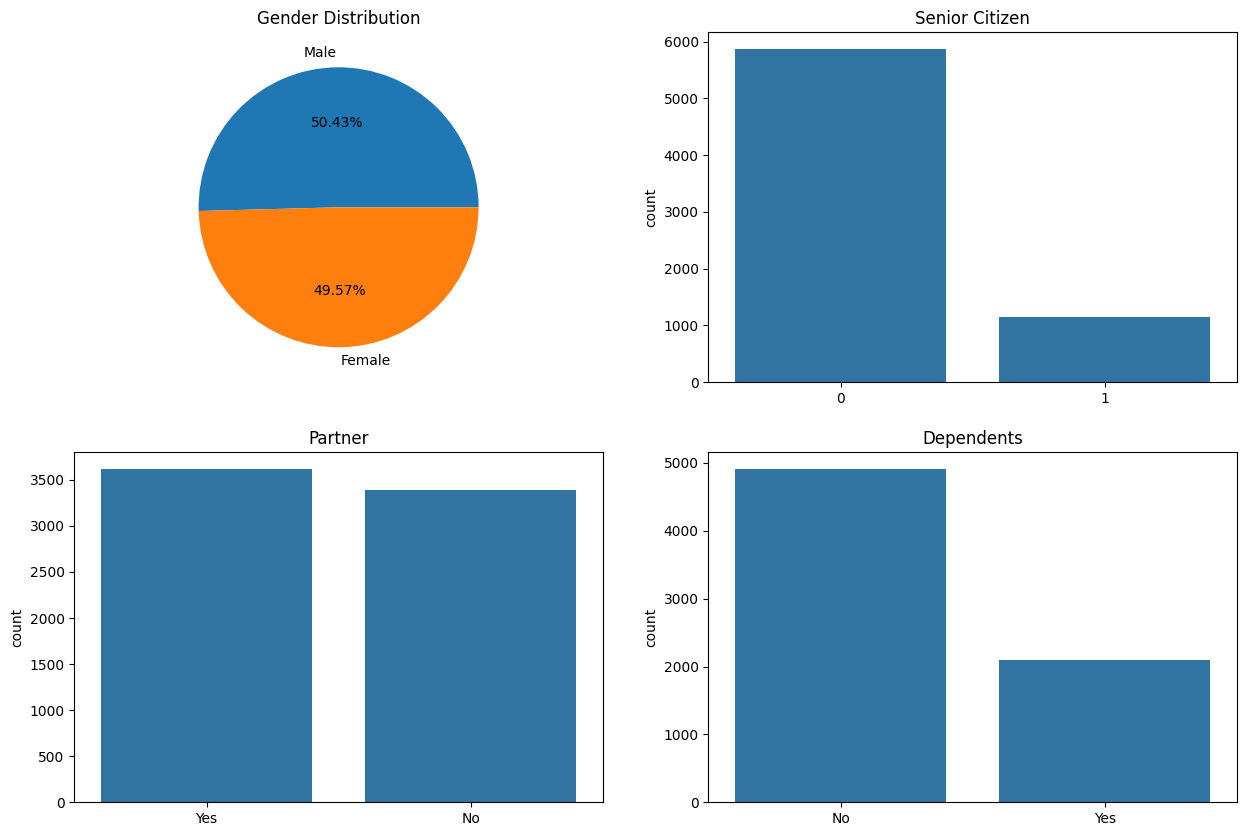

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
#Gende distribution
ax[0,0].pie(df['gender'].value_counts(), labels =['Male', 'Female'], autopct = '%1.2f%%')
ax[0,0].set_title('Gender Distribution')
#Senior Citizen Distribution
sns.barplot(y= df['SeniorCitizen'].value_counts(), x= df['SeniorCitizen'].unique(), ax=ax[0,1]).set_title('Senior Citizen')
#Partner Distribution
sns.barplot(y=df['Partner'].value_counts(), x= df['Partner'].unique(), ax=ax[1,0]).set_title('Partner')
#Dependents Distribution
sns.barplot(y=df['Dependents'].value_counts(), x= df['Dependents'].unique(), ax=ax[1,1]).set_title('Dependents')

Note: These graphs shows the customer demographics. The number of males and females is almost same, with few more males than females in the dataset. Majority of them are not senior citizen. Nearly 3500, customers have a partner and similar number of cutomers don't. Majority of the customers don't have dependents, but still a significant number does have dependents.

From these graphs, we get know about the customers demographics, which help us to get an idea of their psychology based on their age, relationship status, and dependents.

### Services

Text(0.5, 1.0, 'Streaming Movies')

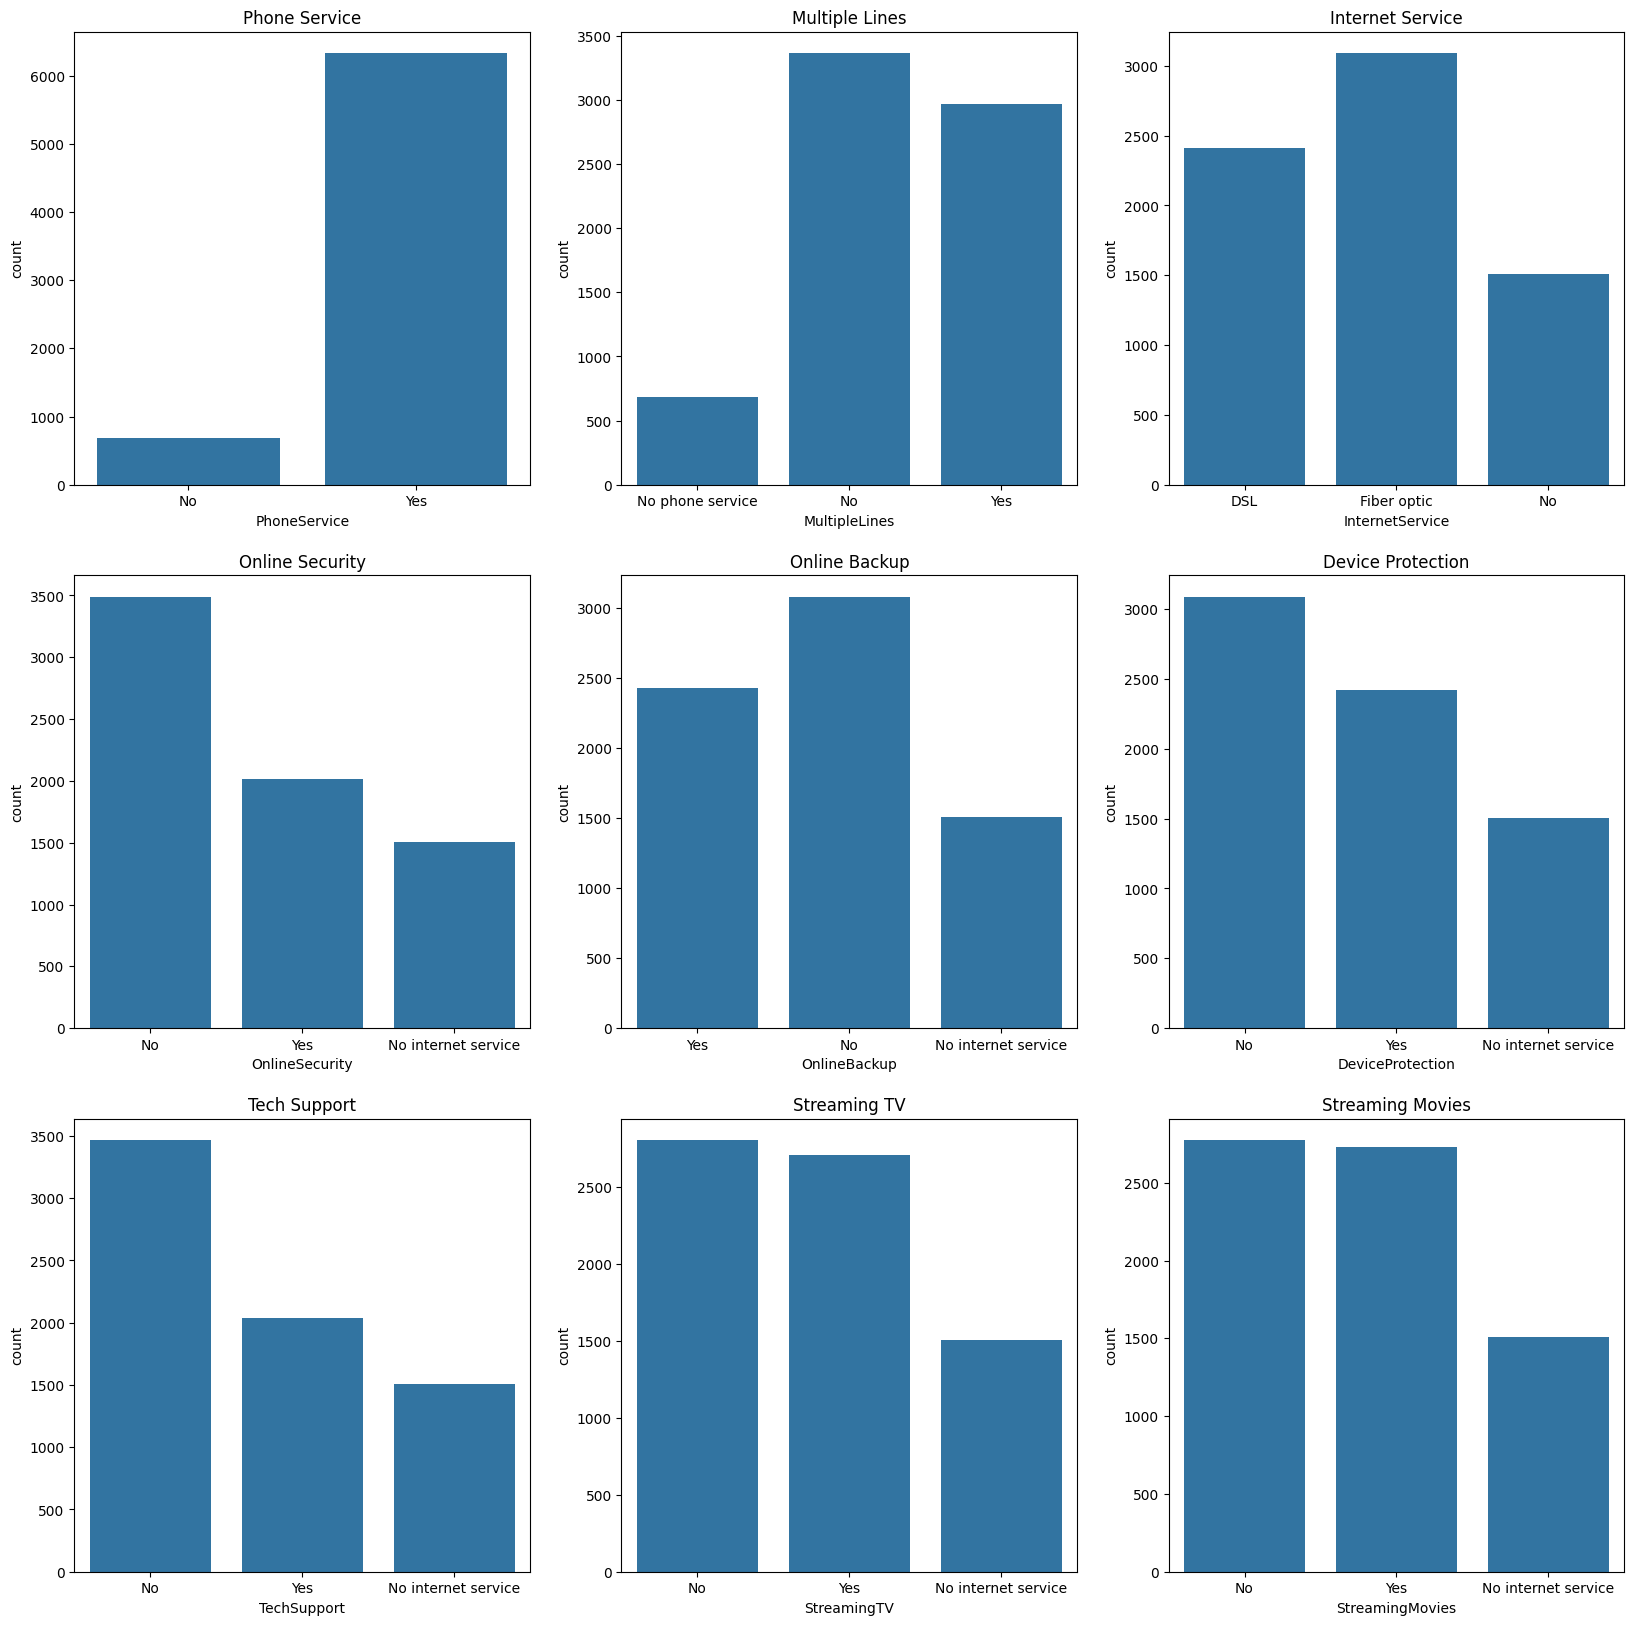

In [14]:
fig, ax = plt.subplots(3,3, figsize=(20,20))
#Phone service.
sns.countplot(x=df['PhoneService'], ax=ax[0,0]).set_title('Phone Service')
ax[0,0].set_title('Phone Service')
#Multiple Lines.
sns.countplot(x = df['MultipleLines'], ax=ax[0,1]).set_title('Multiple Lines')
ax[0,2].set_title('Multiple Lines')
sns.countplot(x = df['InternetService'], ax=ax[0,2]).set_title('Internet Service')
ax[0,2].set_title('Internet Service')
#Online Security.
sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0]).set_title('Online Security')
ax[1,0].set_title('Online Security')
#Online Backup.
sns.countplot(x = df['OnlineBackup'], ax=ax[1,1]).set_title('Online Backup')
ax[1,1].set_title('Online Backup')
#Device Protection.
sns.countplot(x = df['DeviceProtection'], ax=ax[1,2]).set_title('Device Protection')
ax[1,2].set_title('Device Protection')
#Tech Support.
sns.countplot(x = df['TechSupport'], ax=ax[2,0]).set_title('Tech Support')
ax[2,0].set_title('Tech Support')
#Streaming TV.
sns.countplot(x = df['StreamingTV'], ax=ax[2,1]).set_title('Streaming TV')
ax[2,1].set_title('Streaming TV')
#Streaming Movies.
sns.countplot(x = df['StreamingMovies'], ax=ax[2,2]).set_title('Streaming Movies')
ax[2,2].set_title('Streaming Movies')


Note: The above graphs visualizes the services taken by the customers from the telecom company. Nearly 6000 customers have taken phone service. However, nealry half of the cutomers have taken multiplt lines from the company. Almost 5500, have taken internet services from the company, where 3000 customers opted fibre optcs and rest of them opted DSL which could possible for business purposes. From these three major services related to telecom, the phone services and the internet services are the most popular services among the customers.

Coming to other services which includes- Online Security, Online Backup, Device Protection, Tech Support, and Streaming Services. The online backup and device protection service is opted by almost 2500 customers, which higlights the customers concern regarding their device safety and data protection. The online security and tech support is opted by almost 2000 customers which are least opted services among the customers. The streaming services are the most popular services, with more than 2500 customers opting for it.

From this, I conclude that part from the internet and phone services, the streaming services are most opted ones. Therefore, the company should focus on providing better streaming services to the customers.

### Tenure and Contract

Text(0.5, 1.0, 'Contract Type')

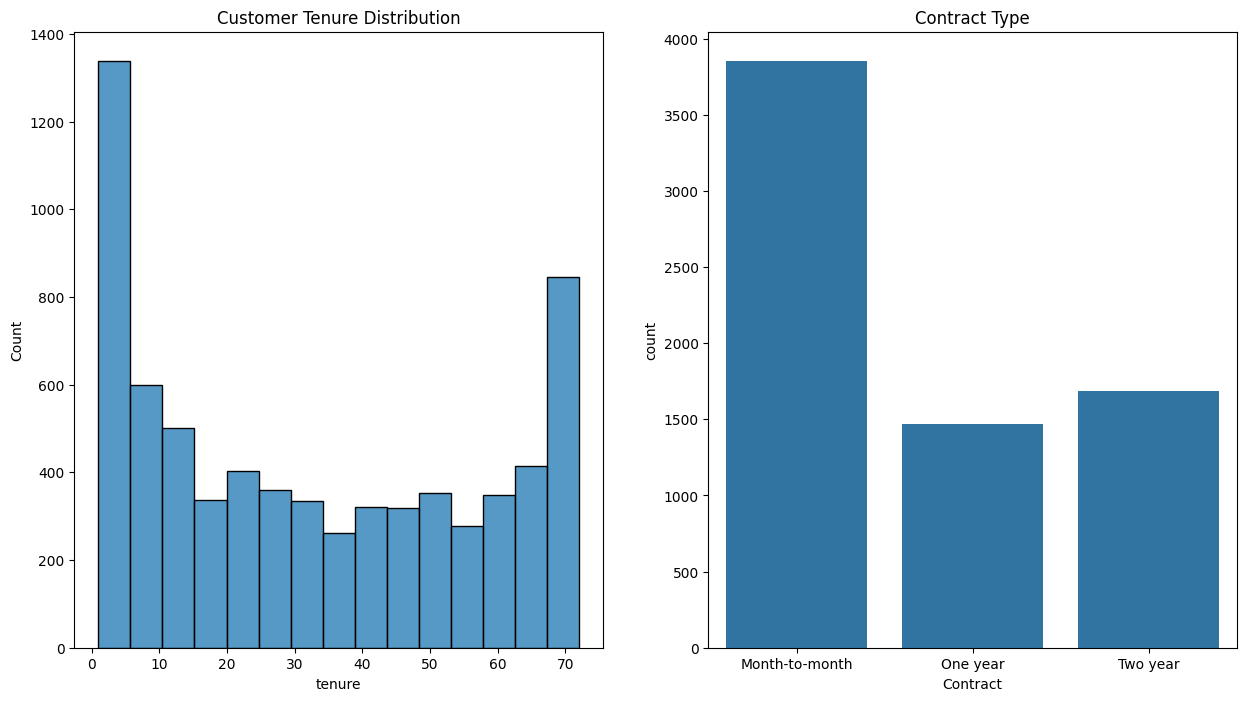

In [15]:
fig, ax= plt.subplots(1,2, figsize=(15,8))
sns.histplot(x='tenure',data=df, ax=ax[0]).set_title('Customer Tenure Distribution')
sns.countplot(x='Contract',data=df, ax=ax[1]).set_title('Contract Type')

## Bill and Charges

Text(0.5, 1.0, 'Total Charges')

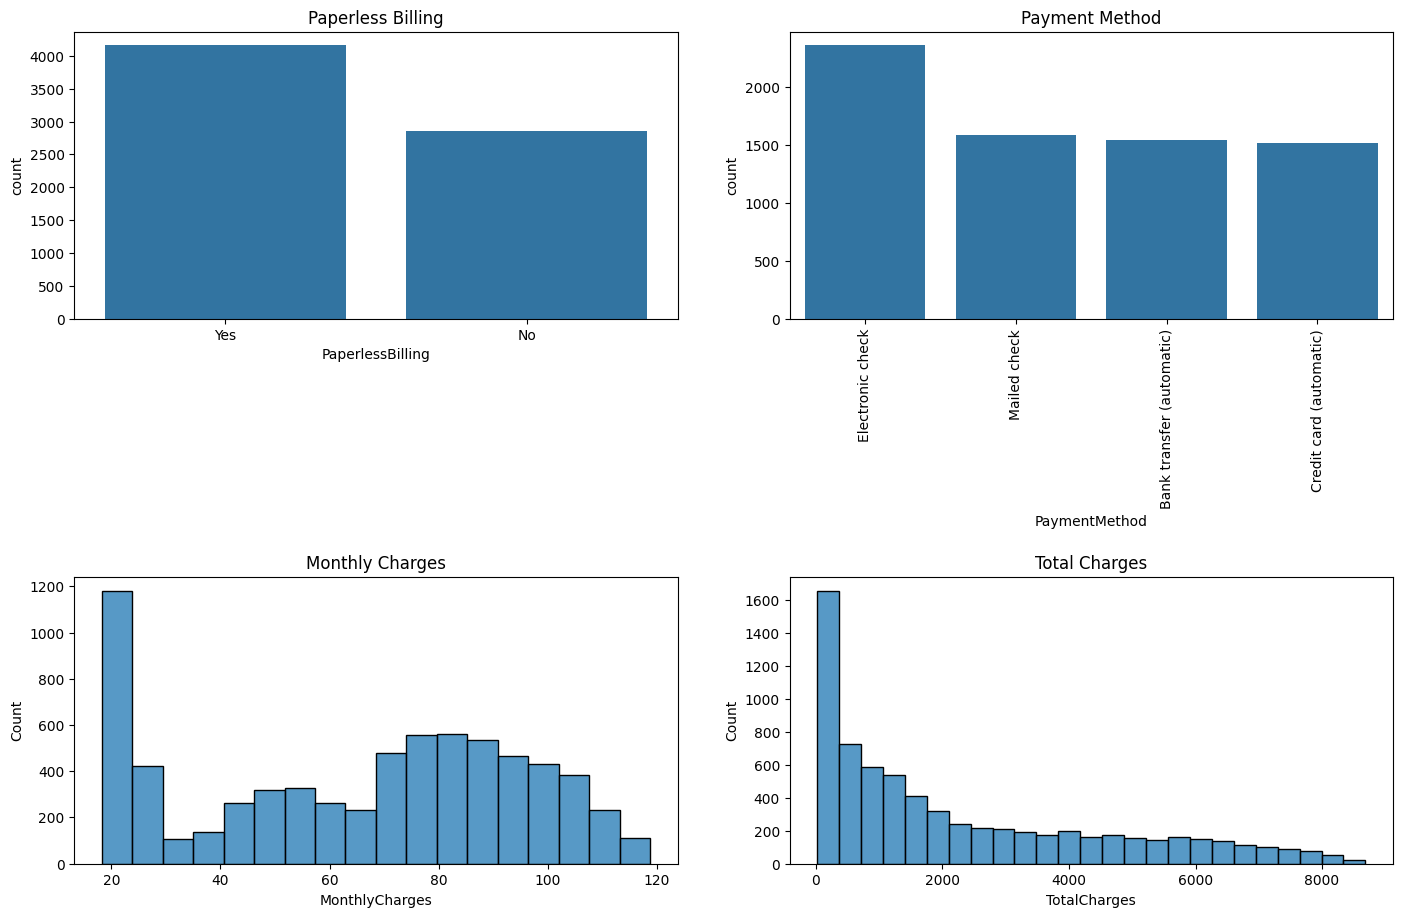

In [25]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
fig.tight_layout(pad=5.0)
#Spacing between subplots
fig.subplots_adjust(hspace=0.9)
#paperless billing
sns.countplot(x=df['PaperlessBilling'], ax=ax[0,0]).set_title('Paperless Billing')
#payment method
sns.countplot(x=df['PaymentMethod'], ax=ax[0,1]).set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=90)
#Monthly Charges Distribution
sns.histplot(x='MonthlyCharges', data=df, ax=ax[1,0]).set_title('Monthly Charges')
#Total Charges Distribution
sns.histplot(x='TotalCharges', data=df, ax=ax[1,1]).set_title('Total Charges') 


Note: These graphs shows the method of billing and the bill amounts. Most of the customers, nearly 4000 prefer paperless billing, however, a little bit over half of them pays through electronic check. But still a significant number of customers prefer paper bills. Apart from electronic checks, the other modes of payment accepted by the company includes - mailed checks, bank transfer and credit cards. Nearly 4500 customers altogether prefer these modes of payment.

Now, for the montly charges, huge number of customers pays near 20 dollars for the montly services and majority of the customer having total charges less than 200 dollars. However, there are considerable number of customers having monthly charges between 70 to 100 dollars and total charges between 200-800 dollars. Interestingly, If we look at the total charges graph, we can see that some customers have a total bill more than 4000 and even 8000 as well. This could be possible, if the customer has a long tenure or uses alot of services.

Now, I conclude that company mainly have customers with low charges, which means comany should focus on these customers by providing even more afforadable services.

### Churm Count

Text(0.5, 1.0, 'Churn Count')

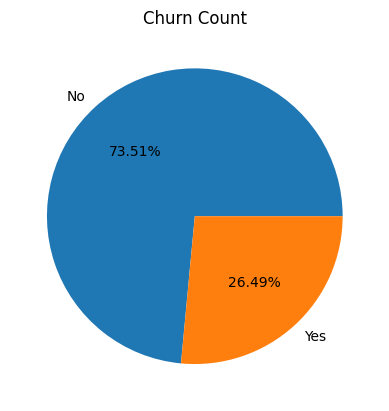

In [17]:
plt.pie(x = df['Churn'].value_counts(), labels = df['Churn'].unique(),autopct='%1.2f%%')
plt.title('Churn Count')

Note: In the dataset, the number of churning customers is very less as compared to non churning. Only 26.49% churnned from the telecom company. This could be a potential proof, that company is quite good at retaning its customers

Till now, I have visualized the data and got a better understanding of the data. Now, I will look at the relationship between the independent variables and the target variable.

## Customer Demographics and Churn

Text(0.5, 1.0, 'Dependents and Churn')

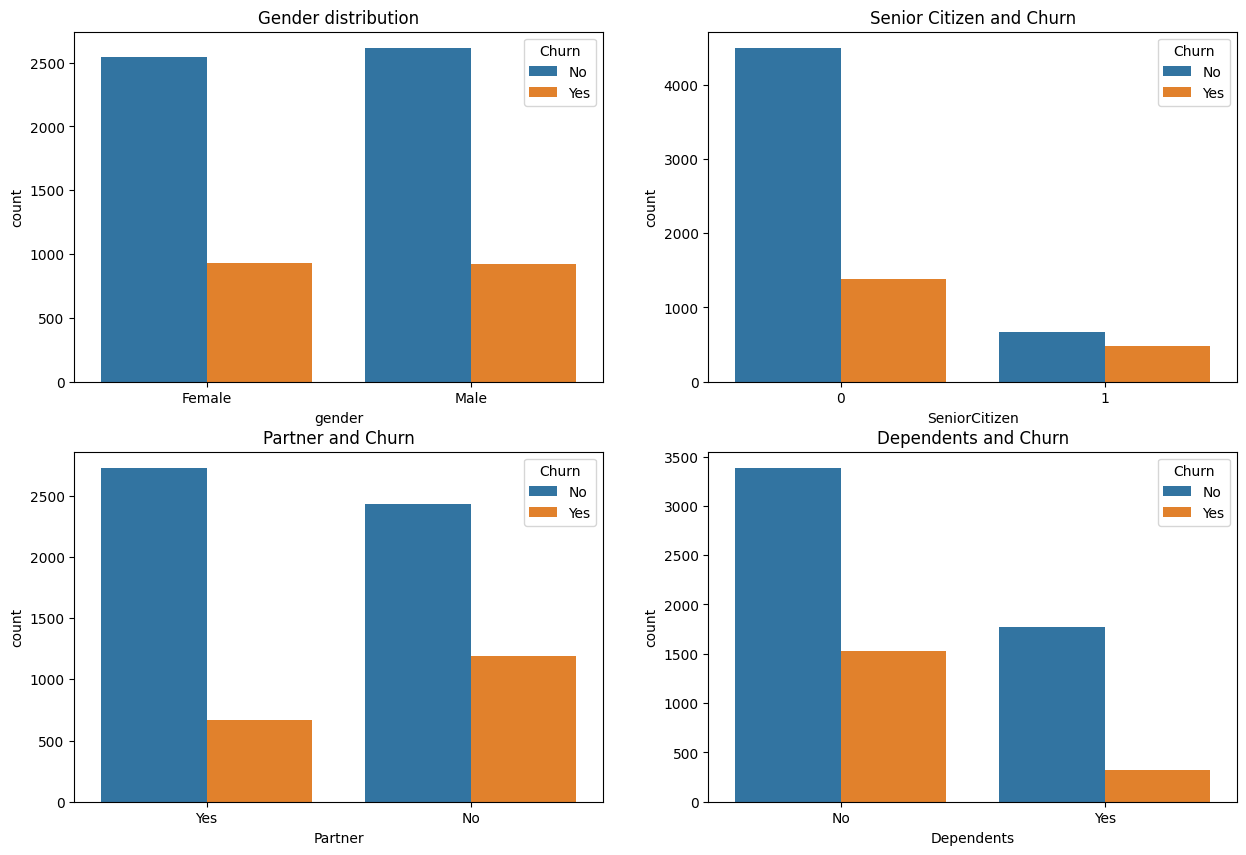

In [18]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
#Gender distribution.
sns.countplot(x='gender', data=df, hue='Churn', ax=ax[0,0])
ax[0,0].set_title('Gender distribution')
#Senior Citizen Distribution
sns.countplot(x=df['SeniorCitizen'], ax=ax[0,1], hue=df['Churn']).set_title('Senior Citizen and Churn')
#Partner Distribution
sns.countplot(x=df['Partner'], ax=ax[1,0], hue=df['Churn']).set_title('Partner and Churn')
#Dependents Distribution
sns.countplot(x=df['Dependents'], ax=ax[1,1], hue=df['Churn']).set_title('Dependents and Churn')


note: From these graphs, we can get know about the relation between customer demographics and customer churn. Both makes and females have equal number of churn count, so there is not relation between gender and customer churn. However, the senior citizens have a lesser churn count as compared to non senior citizens, which may be because their age and they don't want to hasle with the process of changing the telecom company. The customers with no partners have higher churn count as compared to customers with partners. Similarly, customers with no dependents have higher churn count as compared to customers with dependents.

From this I conclude that customers whom are single with no partner or have no dependents have higher churn count and senior citizens have lower churn count.

### Services and Churn

Text(0.5, 1.0, 'Streaming Movies')

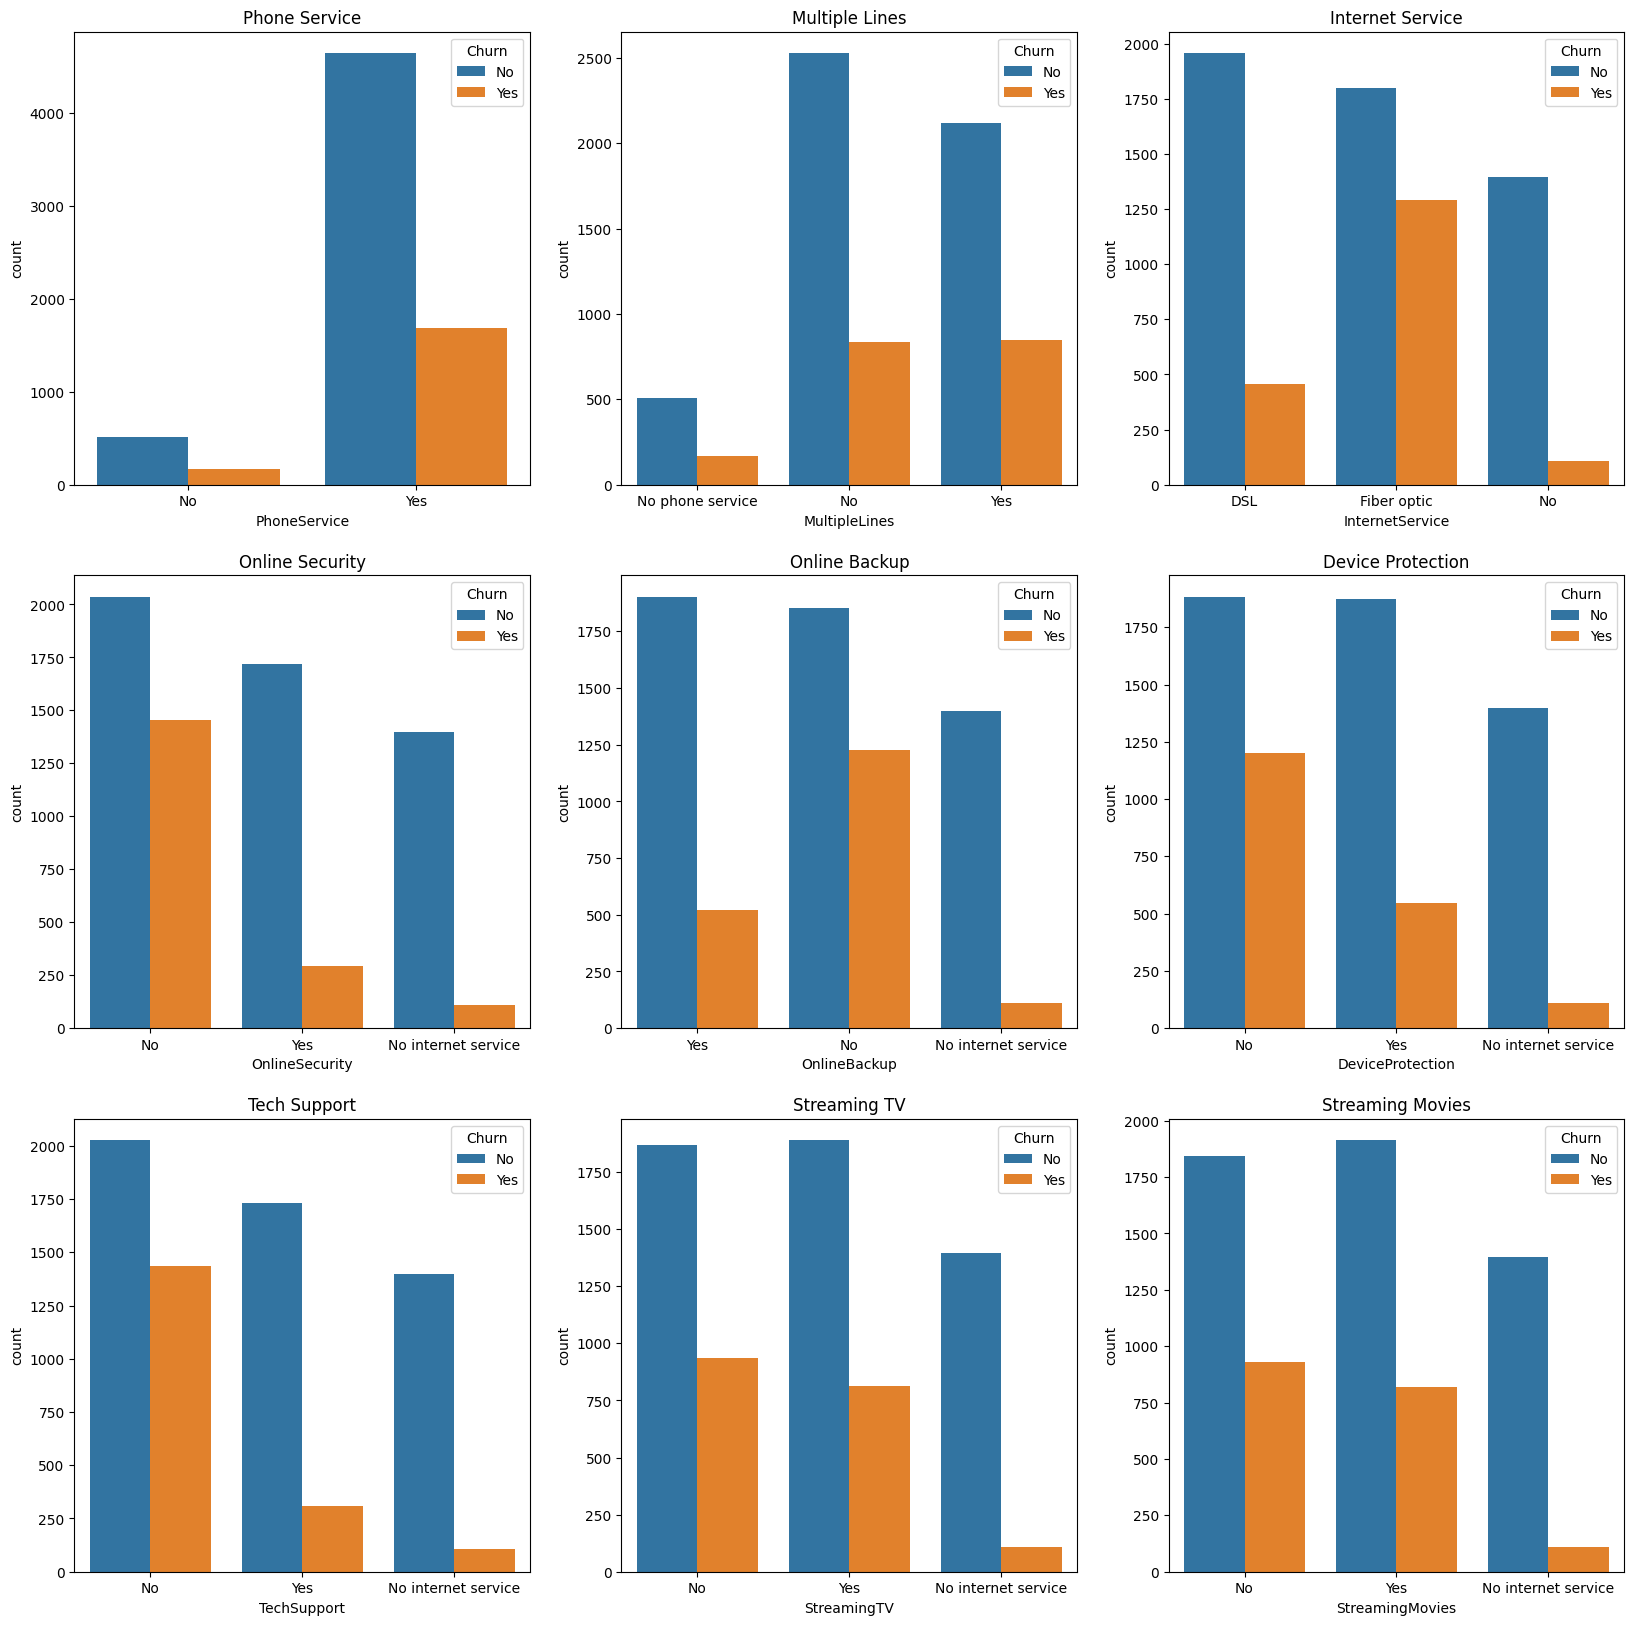

In [21]:
fig, ax = plt.subplots(3,3,figsize=(20,20))
#phone service.
sns.countplot(x =df['PhoneService'], ax=ax[0,0], hue=df['Churn']).set_title('Phone Service')
ax[0,0].set_title('Phone Service')
#Multiple Lines.
sns.countplot(x =df['MultipleLines'], ax=ax[0,1], hue=df['Churn']).set_title('Multiple Lines')
ax[0,1].set_title('Multiple Lines')
#Internet Service.
sns.countplot(x =df['InternetService'], ax=ax[0,2], hue=df['Churn']).set_title('Internet Service')
ax[0,2].set_title('Internet Service')
#Online Security.
sns.countplot(x =df['OnlineSecurity'], ax=ax[1,0], hue=df['Churn']).set_title('Online Security')
ax[1,0].set_title('Online Security')
sns.countplot(x =df['OnlineBackup'], ax=ax[1,1], hue=df['Churn']).set_title('Online Backup')
ax[1,1].set_title('Online Backup')
sns.countplot(x =df['DeviceProtection'], ax=ax[1,2], hue=df['Churn']).set_title('Device Protection')
ax[1,2].set_title('Device Protection')  
sns.countplot(x =df['TechSupport'], ax=ax[2,0], hue=df['Churn']).set_title('Tech Support')
ax[2,0].set_title('Tech Support')   
sns.countplot(x =df['StreamingTV'], ax=ax[2,1], hue=df['Churn']).set_title('Streaming TV')
ax[2,1].set_title('Streaming TV')
sns.countplot(x =df['StreamingMovies'], ax=ax[2,2], hue=df['Churn']).set_title('Streaming Movies')
ax[2,2].set_title('Streaming Movies')

These graphs visualizes the relation between customer churn based on services opted by the customer. In the phone and internet service, there is no relation between churn and service opted, however the churn count is higher for the customers, who have taken multiple lines. Coming to other services, where customers who have not taken Online backup or Device Protection service has higher churn count, than those who have opted. Moreover, the customers with streaming services have lower churn count as compared to those who have not opted for it.

Therefore, certain services have relation with the customer churn, which are multiple lines, Online Backup, Device Protection, and Streaming Services.

### Tenure/Contract and Churn

Text(0.5, 1.0, 'Contract Type and Churn')

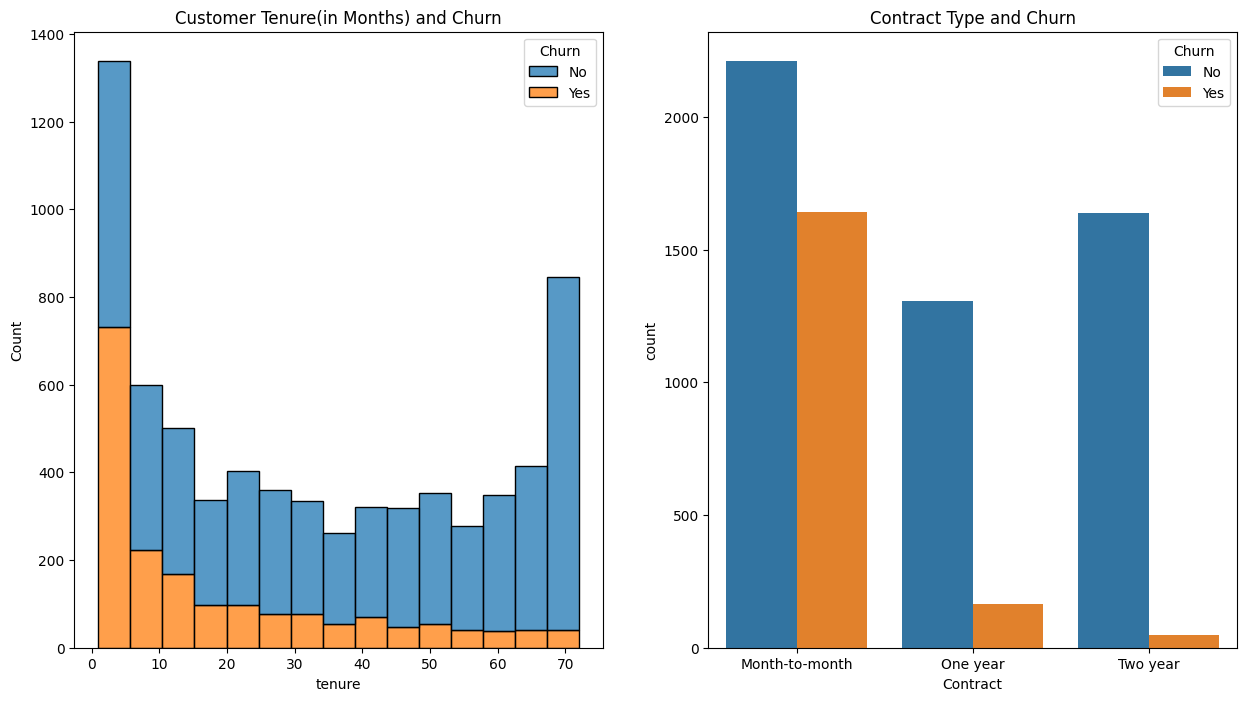

In [23]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.histplot(x = 'tenure', data=df, ax=ax[0], hue='Churn', multiple='stack').set_title('Customer Tenure(in Months) and Churn')
sns.countplot(x = 'Contract', data = df, ax=ax[1], hue= 'Churn').set_title('Contract Type and Churn')

## Billing/Charges and Churn

Text(0.5, 1.0, 'Total Charges and Churn')

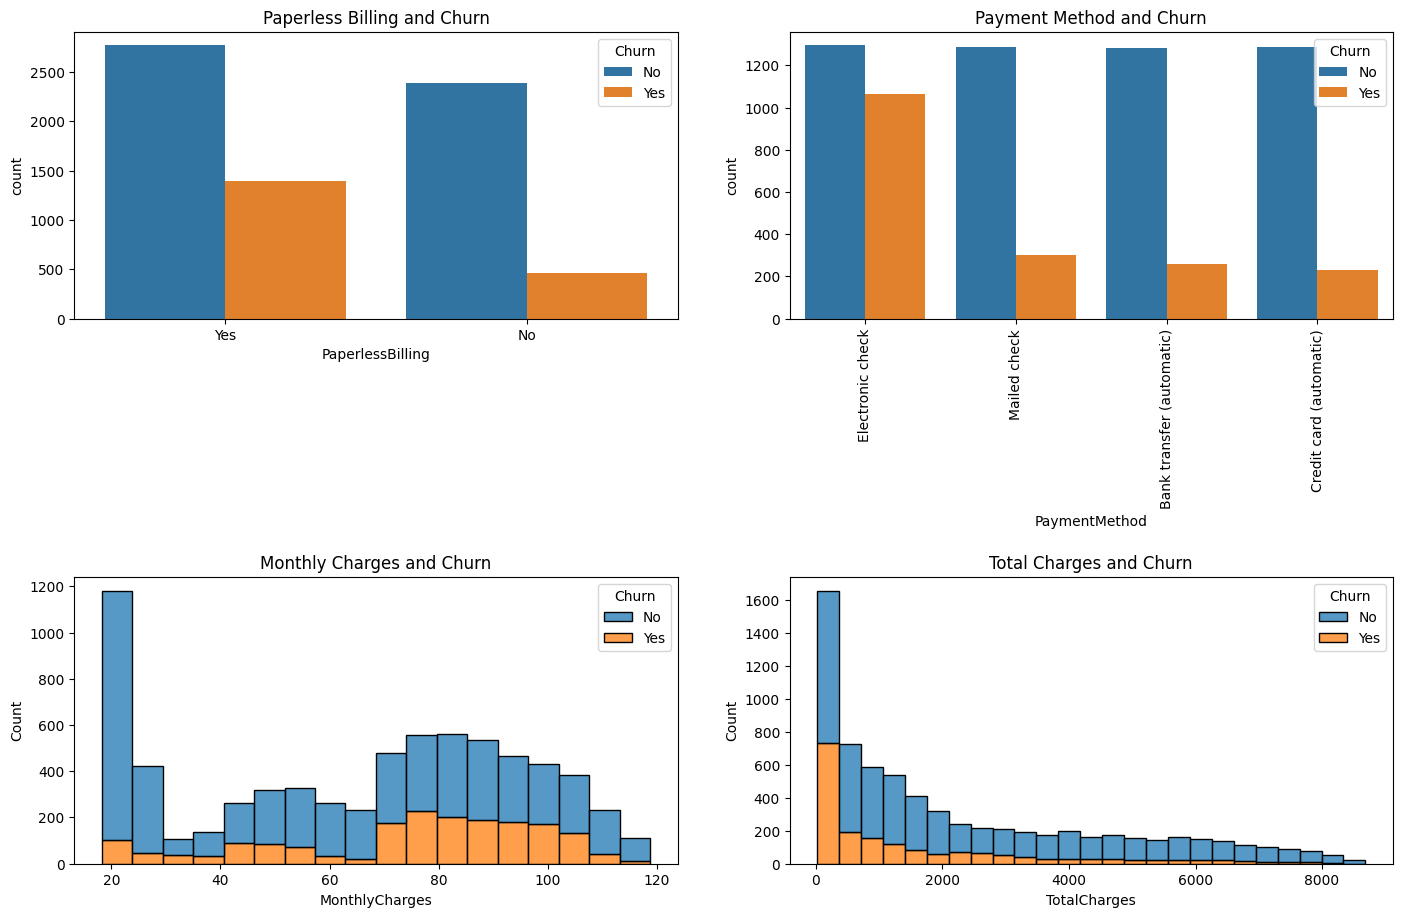

In [31]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
fig.tight_layout(pad=5.0)
#spacing between subplots
fig.subplots_adjust(hspace=0.9)
#paperless billing.
sns.countplot(x=df['PaperlessBilling'], ax=ax[0,0], hue=df['Churn']).set_title('Paperless Billing and Churn')
#payment method
sns.countplot(x=df['PaymentMethod'], ax=ax[0,1], hue=df['Churn']).set_title('Payment Method and Churn')
ax[0,1].xaxis.set_tick_params(rotation=90)
#Monthly Charges.
sns.histplot(x='MonthlyCharges', data=df, ax=ax[1,0], hue='Churn', multiple='stack').set_title('Monthly Charges and Churn')
#Total Charges.
sns.histplot(x='TotalCharges', data=df, ax=ax[1,1], hue='Churn', multiple='stack').set_title('Total Charges and Churn')

note: The paperless billing and payment method have not significant relation with the customer churn. However, the montly and total charges do have a interesting relation with the customer churn. The customers with higher monthly charges have higher churn count, which is quite obvious. But, the customers with higher total charges have lower churn count, which is quite interesting. This could be possible, if the customer has a long tenure or uses alot of services. Therefore, the company should focus on lowering the monthly charges for the customers in order to reduce the churn count.